In [1]:
import torch
import torchvision.transforms as transforms
from torchvision.models.detection import fasterrcnn_resnet50_fpn
import cv2
import numpy as np
import matplotlib.pyplot as plt



In [11]:
import torchvision.models.detection as detection

# Tải mô hình SSD đã huấn luyện trước
model = detection.ssd300_vgg16(pretrained=True)
model.eval()


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to C:\Users\ADMIN/.cache\torch\hub\checkpoints\ssd300_vgg16_coco-b556d3b4.pth
100%|██████████| 136M/136M [00:06<00:00, 22.1MB/s] 


SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

In [2]:
# Tải mô hình Fast R-CNN đã huấn luyện trước
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Đặt mô hình về chế độ đánh giá




c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [12]:

# Hàm để xử lý hình ảnh
def preprocess_image(image_path):
    # Đọc hình ảnh và chuyển đổi sang định dạng RGB
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Chuyển đổi hình ảnh thành tensor
    transform = transforms.ToTensor()
    image_tensor = transform(image)
    
    return image, image_tensor

# Hàm để vẽ hộp giới hạn và đếm đối tượng
def draw_boxes(image, boxes, labels, scores, threshold=0.5):
    count = 0
    for i in range(len(boxes)):
        if scores[i] > threshold:  # Kiểm tra ngưỡng xác suất
            count += 1
            box = boxes[i].detach().numpy()  # Chuyển đổi tensor thành numpy
            cv2.rectangle(image, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (255, 0, 0), 2)
            cv2.putText(image, f'Object {labels[i]}: {scores[i]:.2f}', 
                        (int(box[0]), int(box[1] - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    return count

In [13]:
# Đếm và vẽ hộp giới hạn
def count_objects_in_image(image_path):
    image, image_tensor = preprocess_image(image_path)
    
    with torch.no_grad():  # Tắt gradient để tiết kiệm bộ nhớ
        predictions = model([image_tensor])
    
    boxes = predictions[0]['boxes']
    labels = predictions[0]['labels']
    scores = predictions[0]['scores']
    
    # Vẽ hộp giới hạn
    object_count = draw_boxes(image, boxes, labels, scores)
    
    # Hiển thị hình ảnh
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
    return object_count




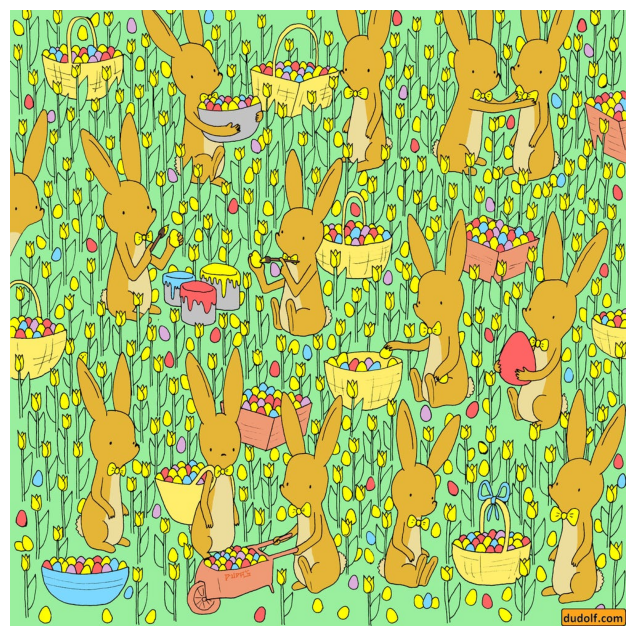

Số lượng đối tượng trong hình ảnh: 0


In [14]:
# Sử dụng hàm
image_path = "C:\\Users\\ADMIN\\Videos\\Finding-Counting-ImageSet\\Counting\\rabbit.jpeg" # Đường dẫn đến hình ảnh của bạn
object_count = count_objects_in_image(image_path)
print(f"Số lượng đối tượng trong hình ảnh: {object_count}")

In [6]:
model.parameters

<bound method Module.parameters of FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(25

In [8]:
!pip install ultralytics


  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/ab/6b/fbdf67ce017caa7f402dd879c16fa26bd8dda74c69849b7a4319586c7bef/ultralytics-8.3.10-py3-none-any.whl.metadata
  Obtaining dependency information for py-cpuinfo from https://files.pythonhosted.org/packages/e0/a9/023730ba63db1e494a271cb018dcd361bd2c917ba7004c3e49d5daf795a2/py_cpuinfo-9.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for ultralytics-thop>=2.0.0 from https://files.pythonhosted.org/packages/9b/67/3c4a4495b6398991bc13296ff9ff7f98ceb081d335213f97ceadac512944/ultralytics_thop-2.0.9-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/882.7 kB ? eta -:--:--
   -- ------------------------------------- 61.4/882.7 kB 3.2 MB/s eta 0:00:01
   ----- ---------------------------------- 122.9/882.7 kB 1.4 MB/s eta 0:00:01
   --------- ------------------------------ 204.8/882.7 kB 1.8 MB/s eta 0:00:01
   ------------ --------------------------- 286.7/882


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/ab/6b/fbdf67ce017caa7f402dd879c16fa26bd8dda74c69849b7a4319586c7bef/ultralytics-8.3.10-py3-none-any.whl.metadata
  Using cached ultralytics-8.3.10-py3-none-any.whl.metadata (34 kB)
  Obtaining dependency information for py-cpuinfo from https://files.pythonhosted.org/packages/e0/a9/023730ba63db1e494a271cb018dcd361bd2c917ba7004c3e49d5daf795a2/py_cpuinfo-9.0.0-py3-none-any.whl.metadata
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Obtaining dependency information for ultralytics-thop>=2.0.0 from https://files.pythonhosted.org/packages/9b/67/3c4a4495b6398991bc13296ff9ff7f98ceb081d335213f97ceadac512944/ultralytics_thop-2.0.9-py3-none-any.whl.metadata
  Using cached ultralytics_thop-2.0.9-py3-none-any.whl.metadata (9.3 kB)
Using cached ultralytics-8.3.10-py3-none-any.whl (882 kB)
Using cached ultralytics_thop-2.0.9-py3-none-any.whl (26 kB)
Using cached py_cpuinfo-9.0.0-py

In [9]:
from ultralytics import YOLO

# Tải mô hình YOLOv5 đã được huấn luyện trước (pretrained)
model = YOLO('yolov5s.pt')  # Có thể thay bằng phiên bản khác như yolov5m.pt hoặc yolov5l.pt

# Dự đoán đối tượng trong hình ảnh
results = model("C:\\Users\\ADMIN\\Videos\\Finding-Counting-ImageSet\\Counting\\rabbit.jpeg")  # Đường dẫn đến ảnh của bạn

# Hiển thị kết quả và đếm số lượng đối tượng
results.show()

# Đếm số đối tượng
object_count = len(results[0].boxes)
print(f"Số lượng đối tượng: {object_count}")


Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\ADMIN\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
PRO TIP  Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:01<00:00, 10.5MB/s]



image 1/1 C:\Users\ADMIN\Videos\Finding-Counting-ImageSet\Counting\rabbit.jpeg: 640x640 1 vase, 383.4ms
Speed: 13.9ms preprocess, 383.4ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 640)


AttributeError: 'list' object has no attribute 'show'

In [10]:
object_count = len(results[0].boxes)
print(f"Số lượng đối tượng: {object_count}")


Số lượng đối tượng: 1
